In [63]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


In [3]:
SPOTIPY_CLIENT_ID='aa3b040fe8a14f47babd5211bc20f4c8'  
SPOTIPY_SECRET_ID='7274e34729fc407d9f0bef405fd24805'
SPOTIPY_REDIRECT_URI='http://localhost:3005/callback/'

In [4]:
scope = "user-library-read, playlist-read-private, user-read-private, user-read-playback-state, user-top-read, user-follow-read, user-read-currently-playing, user-read-recently-played"

auth_manager = SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID, client_secret= SPOTIPY_SECRET_ID, redirect_uri=SPOTIPY_REDIRECT_URI, scope=scope)
sp = spotipy.Spotify(auth_manager=auth_manager)



In [5]:
playlists = sp.current_user_playlists()
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:2ijdBcHfEmWXoz2QDn8YHx Groove
   2 spotify:playlist:3e74riRWhnRhgvSGWbrHdm Parties...
   3 spotify:playlist:1b9TmDoNUFe9IzTgAcyDzO Soul


In [6]:
albums = sp.current_user_saved_albums(limit=50)
for album in albums['items']:
    print(album['album']['name'])



Remember Your North Star
Janky Star
Step By Step EP
The Heart Part 5
Classic Objects
Blackstar
Big Time
HYPNOS
Mr. Morale & The Big Steppers
A Light for Attracting Attention
Car Therapy Sessions
Space 1.8
Butterfly
Air
ENTERTAINMENT, DEATH
Untourable Album
5.17
PAINLESS
Dragon New Warm Mountain I Believe In You
Drawing Room
Time Skiffs
Aja
Asakusa Light
Magical Mystery Tour (Remastered)
Sometimes I Might Be Introvert
Let It Be (Remastered)
Fatigue
Jubilee
What's Your Pleasure? (The Platinum Pleasure Edition)
Nosso Ritmo
xx
I See You
Coexist
Blue Weekend
Yankee Hotel Foxtrot
Summerteeth
Titanic Rising
Front Row Seat to Earth
Weezer (Green Album)
Weezer
Pinkerton
Ignorance
Lost In The Dream
The Velvet Underground & Nico 45th Anniversary
It's Album Time
Contra
Father of the Bride
Modern Vampires of the City
Vampire Weekend
Boy (Remastered)


In [7]:
playlists = sp.current_user_playlists()
groove = playlists['items'][0] #first playlist



In [8]:
def get_top_tracks():
    top_tracks = sp.current_user_top_tracks(limit=50)
    artists = []
    track_names = []
    track_ids = []
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    
    for idx, item in enumerate(top_tracks['items']):
        track = item['name']
        uri = item['uri']
        artist = item['artists'][0]['name']
        artists.append(artist)
        track_names.append(track)
        track_ids.append(uri)
        features = sp.audio_features(uri)[0]
        danceability.append(features['danceability'])
        energy.append(features['energy'])
        key.append(features['key'])
        loudness.append(features['loudness'])
        mode.append(features['mode'])
        speechiness.append(features['speechiness'])
        acousticness.append(features['acousticness'])
        instrumentalness.append(features['instrumentalness'])
        liveness.append(features['liveness'])
        valence.append(features['valence'])
        tempo.append(features['tempo'])

    df = pd.DataFrame(list(zip(track_ids,track_names,artists, 
                        danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness, valence, tempo)), 
                        columns=['id','name','artist', 'danceability','energy','key','loudness','mode','speechiness','acousticness',
                        'instrumentalness','liveness','valence', 'tempo'])
    return df





In [30]:
top_tracks_df = get_top_tracks()
mean_df = top_tracks_df.mean(axis=0)
top_tracks_df.head(10)



C:\Users\emile\AppData\Local\Temp\ipykernel_14424\3479958638.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:5wJLHCCnOmakrb8JdGQyUE,Southern Magnolia,Maharaj Trio,0.694,0.644,9,-10.038,0,0.0334,0.00104,0.746000,0.0737,0.5290,104.953
1,spotify:track:5MMW4CZsZiZt2iuqAXzzWC,The Heart Part 5,Kendrick Lamar,0.700,0.812,1,-8.128,0,0.2970,0.18300,0.000000,0.0756,0.8010,97.405
2,spotify:track:5p56JT5F9a1z9pwXnqTg7d,Worldwide Steppers,Kendrick Lamar,0.514,0.472,8,-11.106,0,0.3680,0.75300,0.000120,0.0746,0.5570,77.215
3,spotify:track:4IVtwWBNj9NEBNR7tkXDqb,Satellites,Ravyn Lenae,0.436,0.764,4,-6.347,0,0.0685,0.47400,0.350000,0.1250,0.2660,169.002
4,spotify:track:16yjTWzlK1IVHh3kE61lbJ,Love Me,Braxe + Falcon,0.771,0.726,2,-7.605,0,0.0905,0.00900,0.004940,0.0751,0.5280,107.993
5,spotify:track:6C16HI9Xpyax86txvnWvNV,For One Moment Only,Dieter Reith,0.530,0.531,1,-14.323,1,0.0264,0.59200,0.633000,0.1390,0.5180,95.988
6,spotify:track:5eGvUvIliCcmFqwC8kQSAw,A Hairdryer,The Smile,0.344,0.555,6,-8.946,1,0.0351,0.74600,0.903000,0.1140,0.1120,145.339
7,spotify:track:2IIELm4RfoyxSYuTYDVZ7t,Air,SAULT,0.217,0.223,1,-13.607,1,0.0314,0.92700,0.920000,0.2130,0.0973,70.347
8,spotify:track:72YauydKDuwpnd6nr8NIKK,Home Maker,Sudan Archives,0.766,0.550,1,-7.898,1,0.0758,0.01420,0.045200,0.1230,0.3560,106.990
9,spotify:track:5LOiuvbH62YGtnwe6Ltt4T,Mirror,Kendrick Lamar,0.652,0.670,2,-8.766,1,0.0639,0.22500,0.000014,0.0804,0.2740,91.933


In [29]:

radar_df = mean_df.filter(items=['danceability','energy','speechiness','acoustincess','instrumentalness','liveness','valence','mode',])
fig = px.bar_polar(radar_df, r=radar_df.values, theta=radar_df.index, 
                    range_r = [], color=radar_df.index,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template='plotly_dark')

fig.show()

In [66]:
X = np.array(top_tracks_df.drop(['id','name','artist'], axis=1))

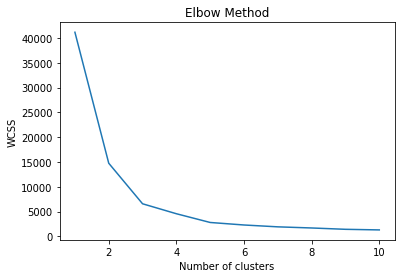

In [67]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=5, random_state=42)
top_tracks_df['cluster'] = kmeans.fit_predict(X)
X_proj = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)

top_tracks_df['X'] = [item[0] for item in X_proj]
top_tracks_df['Y'] = [item[1] for item in X_proj]

fig = px.scatter(top_tracks_df,x='X',y='Y',color='cluster',size='danceability', template='plotly_dark', hover_data=['name','artist'])
fig.show()